# Notebook 04: Final Report Generation & Visualization
## Objective
This notebook creates the final, client-facing deliverables.
## Methodology
Based on our critical finding in Notebook 02, the optimal strategy is to use the GBR Base Model forecast directly as the inventory policy, as all risk-based models were proven to be financially unviable.

- Load the winning 2024 forecast (from 03-model_inference.ipynb).

- Load the full raw historical data (for plotting).

- Generate the final traceability plot showing "History vs. Forecast".

- Save the final, simplified inventory policy report for the client.

## 0. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup ---
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)

## 1. Load Model Artifacts

We load the two key dataframes:

1. Forecast Data: The 2024 forecast generated by our winning GBR model (from Notebook 03).

2. Historical Data: The full raw history (2012-2023) to plot the "before" picture.

In [ ]:
# --- 1. Load the winning 2024 forecast ---
FORECAST_DATA_PATH = '../data/processed/demand_forecasts_2024.csv'
df_forecast = pd.read_csv(FORECAST_DATA_PATH)
df_forecast['fecha'] = pd.to_datetime(df_forecast['fecha']) # Ensure correct dtype

print(f"Forecast data (from N-03) loaded: {len(df_forecast)} rows.")

# --- 2. Load the full raw historical data (for plotting) ---
RAW_DATA_PATH = '../data/raw/demanding_forecast.csv'
df_history = pd.read_csv(RAW_DATA_PATH)
df_history['fecha'] = pd.to_datetime(df_history['fecha']) # Ensure correct dtype

print(f"Full historical data loaded: {len(df_history)} rows.")

Forecast data (from N-03) loaded: 12000 rows.
Full historical data loaded: 80748 rows.


## 2. Generate Final Inventory Policy
Our final policy is simple: the recommended stock is the (rounded) GBR forecast. We create this final column for clarity.

In [3]:
# The final inventory policy *is* the GBR forecast
df_final_report = df_forecast.copy()

# Round the prediction to simulate real-world order units
df_final_report['stock_total_recomendado'] = np.round(df_final_report['prediccion_ventas'])

# Reorder columns for the final report
final_columns = [
    'fecha', 
    'prod_id', 
    'prediccion_ventas', 
    'stock_total_recomendado' # This is the actionable number
]
df_final_report = df_final_report[final_columns]

print("Final inventory policy generated:")
print(df_final_report.head())

Final inventory policy generated:
       fecha  prod_id  prediccion_ventas  stock_total_recomendado
0 2024-01-01        0        2059.984012                   2060.0
1 2024-02-01        0        1472.463920                   1472.0
2 2024-03-01        0        1106.306216                   1106.0
3 2024-04-01        0         880.477605                    880.0
4 2024-05-01        0         827.766047                    828.0


## 3. Save Final Client Report
This is the final deliverable CSV that would be consumed by the client's planning systems.

In [4]:
# Save the final processed report
FINAL_REPORT_PATH = '../data/processed/final_inventory_policy_2024.csv'

df_final_report.to_csv(FINAL_REPORT_PATH, index=False)

print(f"Final client-ready report saved to: {FINAL_REPORT_PATH}")

Final client-ready report saved to: ../data/processed/final_inventory_policy_2024.csv


## 4. Final Visualization: Historical Traceability vs. GBR Forecast
This is the key visual for the project. It shows the complete history of a sample product, seamlessly transitioning to our winning forecast for 2024. This demonstrates the "before and after" impact of our solution.

Generating traceability plot for Product ID 0...
Final traceability plot saved to: ../reports/figures/final_traceability_gbr.png


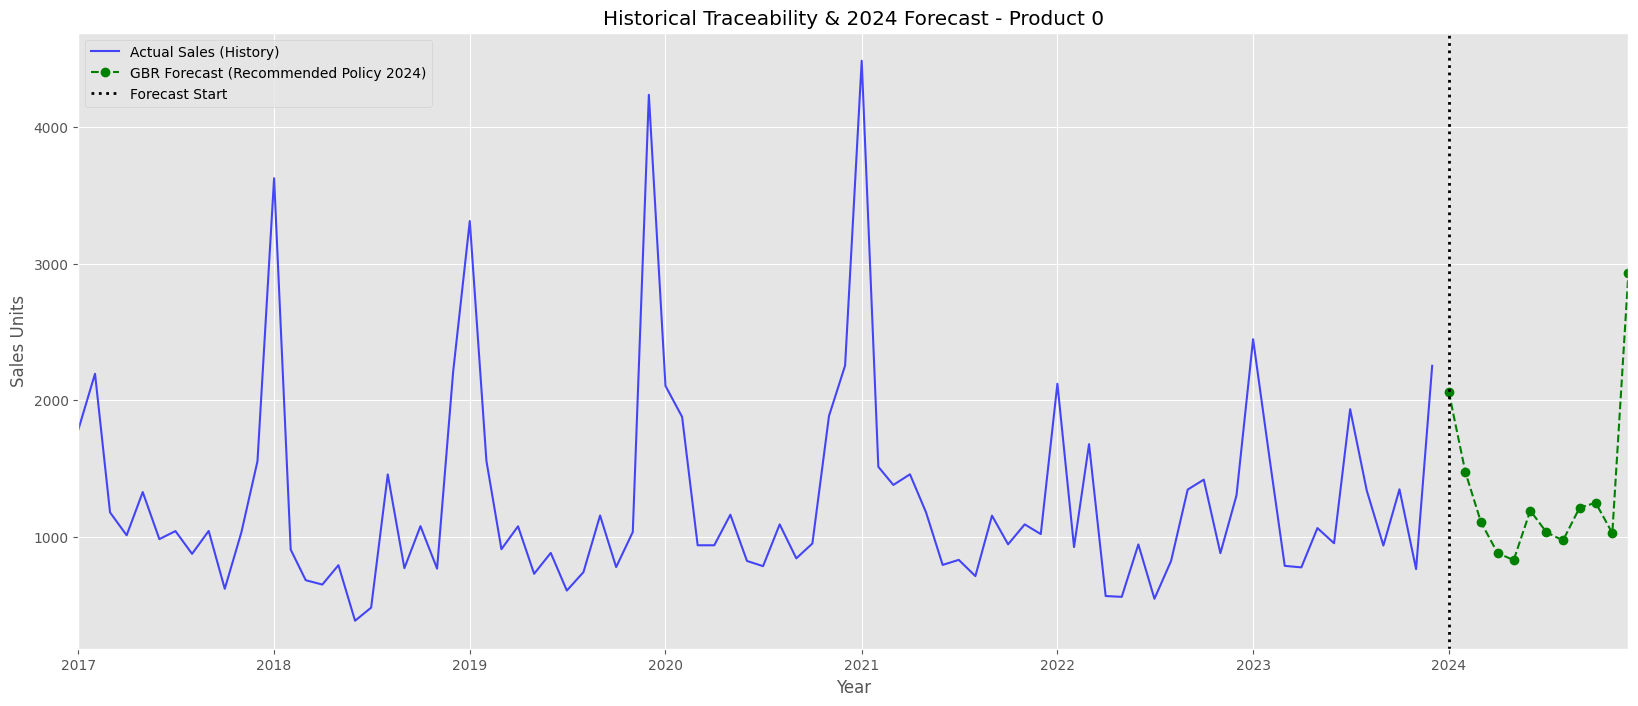

In [5]:
# --- 1. Define Product to Plot ---
PRODUCT_ID_TO_PLOT = 0 # You can change this ID (e.g., 0, 1, 42)

# --- 2. Prepare Dataframes for Plotting ---

# Historical Data (2012-2023)
df_plot_hist = df_history[df_history['prod_id'] == PRODUCT_ID_TO_PLOT]

# Forecast Data (2024)
df_plot_fcst = df_final_report[df_final_report['prod_id'] == PRODUCT_ID_TO_PLOT]

# --- 3. Create the Plot ---
if df_plot_hist.empty or df_plot_fcst.empty:
    print(f"Could not find historical or forecast data for Product ID {PRODUCT_ID_TO_PLOT}")
else:
    print(f"Generating traceability plot for Product ID {PRODUCT_ID_TO_PLOT}...")
    
    plt.figure(figsize=(20, 8)) # Wider format for time-series
    
    # 1. Plot historical actual sales
    plt.plot(
        df_plot_hist['fecha'], 
        df_plot_hist['ventas'], 
        label='Actual Sales (History)', 
        color='blue', 
        alpha=0.7
    )
    
    # 2. Plot the GBR forecast (our winning policy)
    plt.plot(
        df_plot_fcst['fecha'], 
        df_plot_fcst['stock_total_recomendado'], 
        label='GBR Forecast (Recommended Policy 2024)', 
        color='green', 
        linestyle='--',
        marker='o'
    )
    
    # 3. Add the vertical "Forecast" line
    plt.axvline(
        pd.to_datetime('2024-01-01'), 
        color='black', 
        linestyle=':', 
        linewidth=2, 
        label='Forecast Start'
    )
    
    plt.title(f'Historical Traceability & 2024 Forecast - Product {PRODUCT_ID_TO_PLOT}')
    plt.ylabel('Sales Units')
    plt.xlabel('Year')
    
    # Limit x-axis to zoom in (e.g., from 2017)
    plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2024-12-01'))
    
    plt.legend()
    plt.grid(True)
    
    # Save the final figure
    FIGURE_PATH = '../reports/figures/final_traceability_gbr.png'
    plt.savefig(FIGURE_PATH, bbox_inches='tight')
    
    print(f"Final traceability plot saved to: {FIGURE_PATH}")
    plt.show()